# **Fundamentals of Data Science - Winter Semester 2023**


#### Prof. Fabio Galasso, Stefano D'Arrigo (TA), Edoardo De Matteis (TA), Daniele Trappolini (TA)
<galasso@di.uniroma1.it>, <darrigo@di.uniroma1.it> , <dematteis@di.uniroma1.it>, <daniele.trappolini@uniroma1.it>

## **Final Project: Predicting Strikes from MLB Pitching Data**

The goal of this project is to use called strikes [data](https://www.kaggle.com/competitions/nwds-xstrikes/overview) from pitches during the 2022 MLB season to:

- Analyze and get insight on the features that influence an umpire’s decision of whether to call a strike or not.

- Utilize these features to predict pitch calls using **machine learning** models and compare performances between them.

In order to do this, we've divided our work in several individual sections:

1. **Exploratory Data Analysis (EDA):** In this section will explore our dataset and its features, normalize our data and encode categorical features to ensure optimal performance in subsequent analyses.

2. **Feature Engineering and Selection:** In this section we will utilize our data to obtain new features that better capture the underlying patterns and relationships within the datase. Simultaneously, we will perform feature selection to identify and retain the most relevant variables, ensuring a refined and optimal set for model training and interpretation.

3. **Model Implementation and Training:** In this section we will implement our Machine Learning models and train them in order to compare their predictive performances.

4. **Hyperparameter Tuning:** In order to achieve optimal results, in this section, we will perform Hyperparameter Tuning to our models and ensure the best possible performance of each one of them.

5. **Final Remarks and Results:** In this section we will give the final remarks and results about what we obtained during the project.

This Notebook serves as the place where we documented all of our code and the decisions behind it in order to have it all organized in one place and make it easy to understand by everyone that reads our repository. For the final and detailed explanation of our project, please refer to the `final_project_report.pdf` document within this repository.

-------------------------------------

**Members of the team:**

- (Matricola: 2049495) Miguel A. Sanchez Cortes <sanchezcortes.2049495@studenti.uniroma1.it>

- (Matricola: 1912107) Pasquale Luca Tommasino <tommasino.1912107@studenti.uniroma1.it>

- (Matricola: 2130389) Sofia Noemi Crobeddu <sofianoemi.crobeddu@gmail.com>

- (Matricola: 1917002) Gabriele Volzone <volzone.1917002@studenti.uniroma1.it>

- (Matricola: 2125723) Laura Lopez Sanchez <laura.lopez@alum.esci.upf.edu>

-------------------------------------

### **0. Uploading the Classes and Modules**

Before doing any kind of analysis it is necessary to upload both the relevant Classes and Modules we will use to work.

In [1]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix,roc_curve
from modules.neural_net import BinaryClassifier, Network, train_step
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
import modules.auxiliary_functions as aux
import matplotlib.pyplot as plt
from typing import Tuple, List
from ray import train, tune
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import torch 

warnings.filterwarnings("ignore")


-------------------------------------

### **1. Exploratory Data Analysis**

In order to build successful model predictions from our dataset we first have to understand what's inside it and obtain the most information we can about it. We can do this by performing **Exploratory Data Analysis (EDA)**.

Our dataset is the **[Predict Strikes from MLB pitch-by-pitch data](https://www.kaggle.com/competitions/nwds-xstrikes/overview)** from Kaggle which includes pitch data from the 2022 MLB season. Specifically, we chose only the `train.csv` dataset since we intend to build **Supervised Learning** models with it and the `test.csv` dataset doesn't contain any labels.

According to Kaggle:

> This dataset includes only called strikes or balls. This is to limit any noise that would come from swinging strikes (potentially pitches that are out of the strike zone but the batter swung at the pitch, so it counts as a strike) and any foul balls (any contacted pitches that travel beyond the foul lines, which are sometimes considered a strike).

This dataset includes the following features (columns):

1. **pitch_type:** Pitch type codes (Slider, Fastball, Curveball, etc).

2. **release_speed:** Pitch velocity as ball comes out of hand.

3. **release_pos_x:** Horizontal Release Position of the ball measured in feet from the catcher's perspective.

4. **release_pos_z:** Vertical Release Position of the ball measured in feet from the catcher's perspective.

5. **release_pos_y:** Release Position of pitch measured in feet from the catcher's perspective.

6. **release_spin_rate:** Spin rate of the pitch.

7. **spin_axis:** Spin Axis in the two-dimensional x-z plane in degrees from 0 to 360 ($180^{\circ}$ = pure backspin fastball, $0^{\circ}$ = pure topspin curveball).

8. **pfx_x:** Horizontal movement in feet from the catcher's perspective.

9. **pfx_z:** Vertical movement in feet from the catcher's perpsective.

10. **plate_x:** Horizontal position of the ball when it crosses home plate from the catcher's perspective.

11. **plate_z:** Vertical position of the ball when it crosses home plate from the catcher's perspective.

12. **sz_top:** Top of the batter's strike zone set by the operator when the ball is halfway to the plate.

13. **sz_bot:** Bottom of the batter's strike zone set by the operator when the ball is halfway to the plate.

14. **stand:** Side of the plate where the batter is standing.

15. **p_throws:** Hand the pitcher throws with.

16. **balls:** Pre-pitch number of balls in count.

17. **strikes:** Pre-pitch number of strikes in count.

18. **outs_when_up:** Pre-pitch number of outs.

19. **inning:** Pre-pitch inning number.

20. **inning_topbot:** Pre-pitch top or bottom of inning.

21. **if_fielding_alignment:** Infield fielding alignment at the time of the pitch.

22. **of_fielding_alignment:** Outfield fielding alignment at the time of the pitch.

23. **on_1b:** Runner on first base represented as true/false.

24. **on_2b:** Runner on second base represented as true/false.

25. **on_3b:** Runner on third base represented as true/false.

and the target variable:

26. **is_strike:** Whether the pitch was ruled as a strike or a ball, represented as 0/1 (where 1 stands for **strike**)

As we can see, these are a lot of variables that can be (or not be) influential on an umpires decision wheter a pitch is a strike or not. Intuitively we can think that the pitches release speed, along with the type of pitch, number of the inning, and even if the batter has runners on base can be important features that are influential to an umpires decision. However it is up to us to do a more formal analysis of whether our intuitions are true or not.

Before delving into the detail of **choosing** the right features to build our prediction model, we can observe the **distribution** of some of them. First, we can upload the dataset and obtain some information about it:

In [2]:
#Here we read the data and print its information
raw_dataset = pd.read_csv("nwds-xstrikes/train.csv", index_col=0)
raw_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 291271 entries, 0 to 311270
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sz_top                 291271 non-null  float64
 1   sz_bot                 291271 non-null  float64
 2   pitch_type             291271 non-null  object 
 3   release_pos_x          291271 non-null  float64
 4   release_pos_y          291271 non-null  float64
 5   release_pos_z          291271 non-null  float64
 6   stand                  291271 non-null  object 
 7   p_throws               291271 non-null  object 
 8   inning                 291271 non-null  int64  
 9   inning_topbot          291271 non-null  object 
 10  outs_when_up           291271 non-null  int64  
 11  balls                  291271 non-null  int64  
 12  strikes                291271 non-null  int64  
 13  if_fielding_alignment  291271 non-null  object 
 14  of_fielding_alignment  291271 non-null  o

The first thing we can observe is that we don't have **null** data, which is a relief since handling null values is not easy and could become a problem if their number is big. However, we can notice that we have mostly **numeric** columns (17 in total) along with 6 **categorical** columns and 3 **boolean** columns. We can use some of these columns to obtain meaningful plots to better understand our dataset. Let's see some of them.

#### **1.1 Label Distribution**

The first, and more obvious thing we can observe about our dataset is its **label distribution** i.e. along our whole data, how many strikes and balls we have. This can greatly affect our model training and if it is not treated carefully it can make us obtain biased results. As we see:

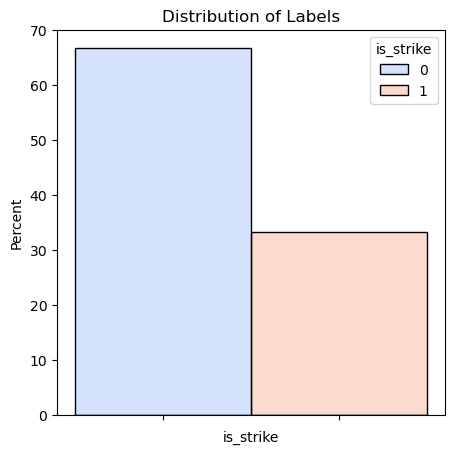

In [3]:
#Here we print the distribution of labels i.e. how many strikes and how many not strikes we have
plt.figure(figsize=(5, 5))
sns.histplot(raw_dataset, x="is_strike", stat="percent", hue="is_strike", discrete=True, palette="coolwarm")
plt.title('Distribution of Labels')
plt.xticks([0, 1], ['', ''])
#plt.savefig('images/label_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


As we can see we have an **unbalanced** dataset since we don't have the same proportion of pitches that were called **strikes** and pitches that weren't called strikes. As we've mentioned before, this will be important when **choosing** which metric to use when evaluating the performance of our models and also when splitting our dataset since it is important to mantain the same proportion of labels in order to not train our classifiers in a **biased** way.

#### **1.2 Strikes by Pitch Type**

We can also plot the distribution of pitch **types** regarding if they are called strikes or not. This could give us insight into which type of pitches usually result in strikes:

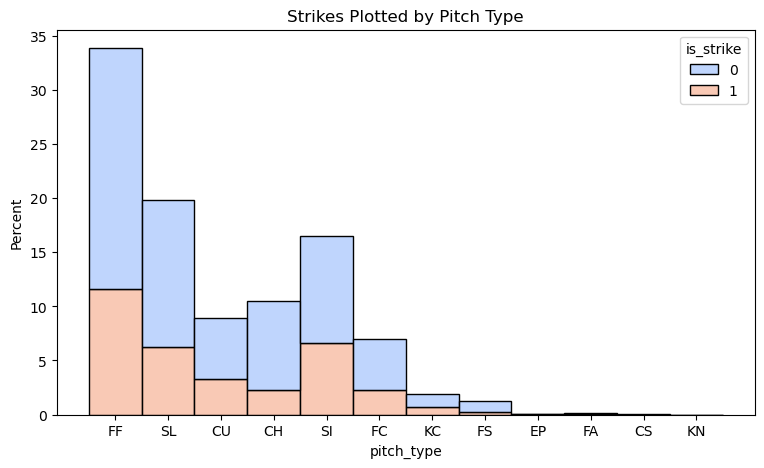

In [4]:
#Here we print the distribution of strikes and not strikes by pitch type
plt.figure(figsize=(9, 5))
sns.histplot(raw_dataset, x="pitch_type", stat="percent", hue="is_strike", multiple="stack", discrete=True, palette="coolwarm")
plt.title('Strikes Plotted by Pitch Type')
#plt.savefig('images/strike_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

As we can observe almost we have almost $\approx 30\%$ of *FF* (Four-Seam Fastball) pitches in our dataset. This is expected since this is a very common pitch in baseball. It is also the type of pitch that has more pitches resulting in **strike**, probably since this is a secure pitch that is normally done when the batter is just one strike away from getting out.

This feature helps us understand which type of pitch is more likely to end up in strike. Another interesting features we can observe are the **strike-zone coordinates**. These coordinates vary depending on the height of the pitcher and its position on the plate, therefore it is important to understand the distribution along the coordinates.

#### **1.3 Strikezone Coordinates Distribution**

Plotting the distribution:

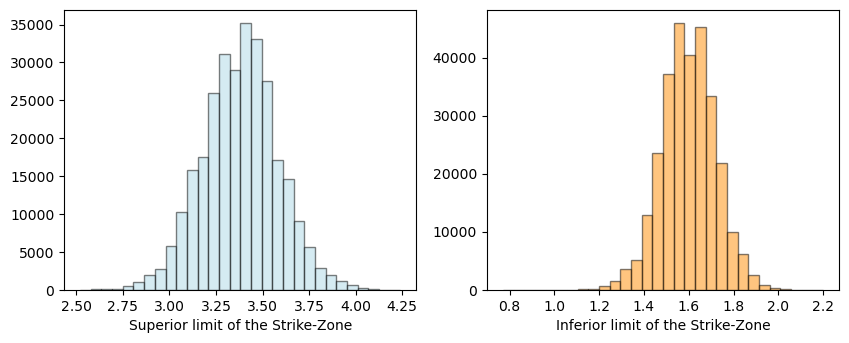

In [5]:
#Here we plot the distribution of strike-zone coordinates
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax1.hist(raw_dataset.sz_top, bins=30, color='lightblue',edgecolor='black', alpha=0.5)
ax1.set_xlabel('Superior limit of the Strike-Zone')
ax2.hist(raw_dataset.sz_bot, bins=30, color='darkorange',edgecolor='black', alpha=0.5)
ax2.set_xlabel('Inferior limit of the Strike-Zone')
#plt.savefig('sz_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

As we can see, on average the strike zone superior limit $\sim 3.5$ (ft) above the plate and the the inferior limit  $\sim 1.5$ (ft) above the plate, giving an average length of the strike-zone of $\sim 2$ ft (this is approximately $60$ cm). This means that tecnically, pitches should enter in a rectangle of  $60$ cm of length in order to be considered strike for the average batter within our dataset.

Using this information we can plot our final data visualization: the pitches of our dataset with respect to the average Strike-Zone.

#### **1.4 Pitch Distribution**

We can plot the coordinates for a subsample of our pitch dataset in order to understand visually which pitches are classified as strikes and which aren't. We can compare the pitches coordinates with the **Strike-Zone** in order to get insights about possible mis-called strikes and the zones above the home plate where it is more probable to call a pitch as a strike.

In order to build this plot we used two functions (to plot the strike-zone and the home plate) created in a Kaggle [Notebook](https://www.kaggle.com/code/nickwan/attack-zones-visualizing-the-strike-zone) by user [Nick Wan](https://www.kaggle.com/nickwan). We don't claim this code as ours but we used it since it is helpful when plotting pitch data.

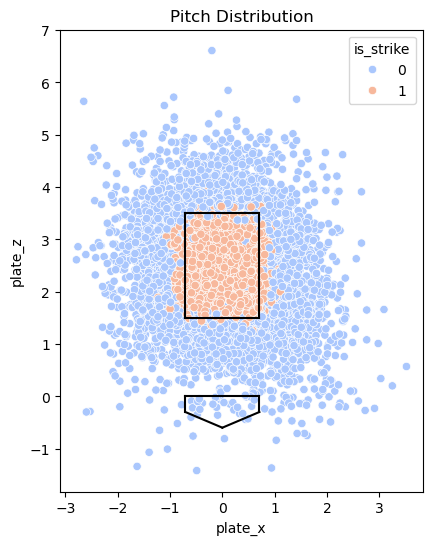

In [6]:
#Here we plot the pitch distribution for a sample of 5000 pitches of our dataset
plt.figure(figsize=(6,6))
fig = sns.scatterplot(data=raw_dataset.sample(5000, random_state=42), x='plate_x', y='plate_z', hue='is_strike', palette='coolwarm')
fig.set_aspect('equal')
aux.draw_home_plate()
aux.draw_sz()
plt.title('Pitch Distribution')
#Here we save the plot with dpi=300 and tight layout
#plt.savefig('images/pitch_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

As we can see, almost all of the pitches in our dataset (sample) fall within our defined **Average Strike-Zone**. Nevertheless there are pitches that fall outside this zone since as we noticed in our **Strike-Zone Coordnates Distribution** we have a not-negligible variation on the coordinates that define the strike-zone and therefore not all strikes are called within the **Average Strike-Zone**.

-------------------------------------

### **2. Feature Engineering and Feature Selection**

Once that we have a good understanding of our dataset we can proceed with our analysis by performing: **Feature Engineering** and **Feature Selection**. Feature Engineering is the process of creating new, and informative features from existing data to improve the performance of Machine Learning models.

Our goal by doing Feature Engineering in our dataset is extracting information from our raw dataset and use this information to train our classification models. By performing Feature Engineering we could potentially select our most important features and therefore reduce our dataset dimensionality without losing information. The features we decided to extract from our dataset are:

1. **Attack Zones:** [Attack Zones](https://www.si.com/mlb/2019/05/11/chris-paddack-san-diego-padres-first-pitch-strikes) are a concept first introduced by Tom Tango at MLB Advanced Media (we learned this notion thanks to the following Kaggle [notebook](https://www.kaggle.com/code/nickwan/attack-zones-visualizing-the-strike-zone)). The purpose of Attack Zones is to provide more context to pitches thrown in and around the **true** Strike-Zone. It is not secret that not all pitches thrown in the true Strike-Zone are called for strikes, and not all pitches thrown outside of the true Strike-Zone are called balls. This results in a round-like Strike-Zone which mostly encompasses the true Strike-Zone but has some gradient properties at the edges of the Strike Zone.

    There exist four defined Attack Zones:

    * **Heart Zone:** The Heart Zone is the zone contained within the **true** Strike-Zone. This area should contain pitches that should all be called strikes.

    * **Shadow Zone:** The Shadow Zone is the zone that covers the edge of the **true** Strike-Zone and several inches beyond this zone. It is characterized as the area where pitches are called strikes $50\%$ of the time.

    * **Chase Zone:** The Chase Zone covers the area that is definitively outside of the **true** Strike-Zone and the Shadow Zone.

    * **Waste Zone:** The Waste Zone covers the area where pitches should never be called strikes (unless a batter is swinging at a pitch in the Waste Zone).

    This feature adds context to pitch location and the Strike-Zone by subdividing pitch location into four groups. This also characterizes pitches by their inherent **probability** of being called strikes depending on their position.

2. **Distance from Center:** We define a pitches *distance from center* as the Euclidean distance between the center of the Strike-Zone $(0,2.5)$ (see the plot for the Pitch Distribution) and the coordinates for each pitch. Let's remember that the euclidean distance between two points $A_{1}$ and $A_{2}$ in this case is defined as:

    $$d(A_{1}, A_{2}) =\sqrt{(x_2-x_1)^2 + (z_2-z_1)^2},$$

    where $(x_{1},z_{1})$ and $(x_{2},z_{2})$ are the coordinates of points $A_{1}$ and $A_{2}$ respectively.

    From this feature we can expect that pitches with a high distance from the center are unlikely to be called strikes and viceversa.

3. **Strike Zone Length:** - This feature captures the full length of the Strike-Zone for a given pitch (and batter). This length is simply obtained as:

    $$l = |sz_{top}-sz_{bottom}|,$$

    where $sz_{top}$ is the distance above the home plate of the top part of the Strike-Zone and $sz_{bottom}$ is the distance above the home plate of the bottom part of the Strike-Zone.

4. **Total Pitch Movement:** We define this feature as the Euclidean distance between the movement coordinates of a pitch from the catchers perspective (pfx_x and pfx_z) and the origin point $(0,0)$. This feature should capture how far away is a pitch with respect from the center from where the pitcher threw the ball.

5. **Movement Above/Below Average:** This feature takes advantage of the last calculated feature and obtains the average total movement for each **pitch type** obtains the total movement above/below that average for each pitch. In this way we can quantify **how much** a given pitch moved above/below average depending on its pitch type.

6. **Pitcher-Hitter Alignment:** This feature combines the pitcher's throwing hand and the batter standing position to create new categories depending on the alignment of bothe pairs(left handed-left stand, left handed-right stand, right handed-left stand, right handed-right stand). This feature can capture how relevant the standing and the throwing hand of a pitcher is for determining a pitch as a strike.

We can, for example, plot the Attack Zones with respect to the pitches in our dataset to observe the division we have defined of the area above the home plate. First, we need to obtain the dataset with the new features taking a function from our `auxiliary_functions.py` module:


In [7]:
#First, we have to obtain the dataset with the new features
engineered_dataset = aux.feature_engineering(raw_dataset)

Now, we can plot the Attack Zones:

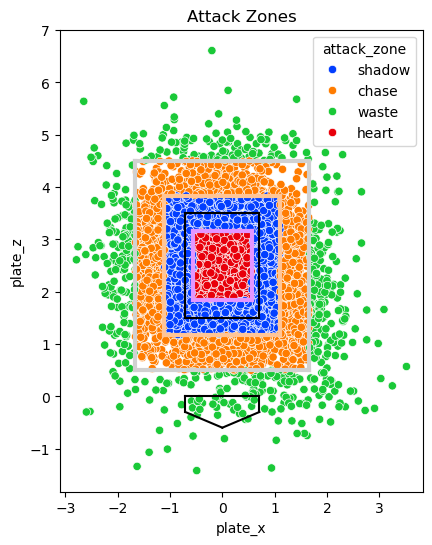

In [8]:
#Here we plot the distribution of attack zones
plt.figure(figsize=(6,6))
fig = sns.scatterplot(data=engineered_dataset.sample(5000, random_state=42), x='plate_x', y='plate_z', hue='attack_zone', palette='bright')
fig.set_aspect('equal')
aux.draw_home_plate()
aux.draw_sz()
aux.draw_attack_zones()
plt.title('Attack Zones')
#plt.savefig('images/attack_zones.png', dpi=300, bbox_inches='tight')
plt.show()

As we can see, we have effectively divided the area above the home plate in 4 divisions (or Attack Zones), where the Heart Attack Zone is the area where all pitches should be called strikes. In the same way, the Shadow Zone defines the area where pitches are called strikes $50\%$ of the time and the Chase Zone defines an area outside the Strike-Zone where hitters are more likely to **swing** at pitches, even if those pitches are not within the boundaries of the Strike-Zone.

As we will see in future sections, the Attack Zones play a **key** role when it comes to classifying pitches.

#### **2.1 Data Encoding and Standardization**

Once we've obtained our last engineered feature we can proceed to a very important step on preparing our training data: encoding it and standardizing. This is done because of the following reasons:

1.  Most machine learning algorithms require numerical input. Since our dataset includes categorical variables (e.g., attack_zone, pitch_type, etc), we need to encode them into numerical values. This ensures that the algorithm can interpret and process the data correctly. To do this, we chose to perform **One-Hot Encoding** since our categorical columns aren't ordinal by nature and therefore by adding their One-Hot representation we make sure that our classifiers don't misinterpret the relationships between different categories.

2.  Some algorithms are sensitive to the scale of the input features. Standardizing or normalizing the data helps ensure that all features contribute equally to the model's learning, preventing any particular feature from dominating the others.

We can perform these steps by using the `convert_to_numeric` function of our `auxiliary_functions.py` module:


In [9]:
#Here we convert the dataset to numeric and standardize its continuous features
numeric_dataset = aux.convert_to_numeric(engineered_dataset, standardize=True)
#Here we print the shape of the numeric dataset
print(numeric_dataset.shape)

(291271, 54)


We are now ready to split our data into **test set**, **train set**, and **validation set**. We perform this separations since:

1. The training set is used to train the model by adjusting its parameters to minimize the error on the training data. This allows the model to learn patterns and relationships within the data, improving its ability to make predictions.

2. By having a designated test set, we can assess how well our machine learning model generalizes to new, unseen data. This ensures that our model is not just memorizing the training data but can make accurate predictions on new instances.

3. The validation set is used for tuning hyperparameters. Hyperparameters are configuration settings that are not learned from the data but affect the learning process. For example, the learning rate in gradient descent. The use of a validation set also helps monitor the model's performance on unseen data, allowing us to identify and address overfitting issues.

Common Ratios to separate train test and validations sets are 60–20–20. We can perform this separation using `sklearn`:

In [10]:
#Here we separate our data into train, validation and test sets
#First we shuffle the data
numeric_dataset = numeric_dataset.sample(frac=1, random_state=42)

#Now, we separate the labels from the features
X = numeric_dataset.drop('is_strike', axis=1)
y = numeric_dataset['is_strike']

#Here we split the data into training (80%) and temporary (20%)
#We use the stratify parameter to ensure that the distribution of labels is the same in both sets since we have an unbalanced dataset
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

#Here we split the temporary set into training (80%) and validation (20%)
#We use the stratify parameter to ensure that the distribution of labels is the same in both sets since we have an unbalanced dataset
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42, shuffle=True, stratify=y_train_temp)

#Here we print the shape of the training, validation and test sets
print(f"The shapes of the training, validation and test sets are {X_train.shape}, {X_val.shape} and {X_test.shape}, respectively.")
print(f"The shapes of the training, validation and test labels are {y_train.shape}, {y_val.shape} and {y_test.shape}, respectively.")

The shapes of the training, validation and test sets are (186412, 53), (46604, 53) and (58255, 53), respectively.
The shapes of the training, validation and test labels are (186412,), (46604,) and (58255,), respectively.


Now that we have separated our features from our labels, we can see that we end up with **54 features** in our dataset. This is potentially catastrophic for training our models since:

1. Training a classifier with a large number of features can be computationally intensive and may require more resources in terms of processing power and memory.

2. Not all features may contribute equally to the predictive power of a model. Some features might be redundant or irrelevant, leading to increased complexity without providing meaningful information.

3. If our model is too complex, it may capture noise and fluctuations in the training set that do not represent true patterns in the underlying data. This can lead to poor generalization and therefore, overfitting.

Therefore, we decided to perform **Feature Selection** in order to identify and keep only the most relevant features for our classification task. Removing irrelevant or redundant features can help simplify the model and reduce overfitting.

#### **2.2 Feature Selection: Random Forest Importance**

In order to perform Feature Selection we chose to use a **Random Forest Classifier** for two main reasons:

1. A **Random Forest** model inherently provides a built-in feature ranking mechanism. During the training process, the algorithm assesses the importance of each feature by measuring the decrease in impurity (e.g., Gini impurity) that it causes when used for splitting nodes in the trees. Features that consistently lead to more significant reductions in impurity are deemed more important. This implicit ranking allows us to easily identify and select the most informative features for our model.

2. Since a Random Forests model is built by combining the predictions of multiple **decision trees**, each trained on a different subset of the data and with random selection of features, it reduces the risk of overfitting compared to individual decision trees.  

We can make a brief explanation of what are Decision Trees and the Random Forest Model before we continue.

##### **2.2.1 Decision Trees**

A **Decision Tree** is a non-parametric supervised learning algorithm. A Decision Tree builds a classification model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. In other words, it breaks down a decision-making process into a series of hierarchical nodes, where each node represents a decision or a test on a particular attribute, and each branch represents the outcome of that decision or test. The tree starts with a root node and extends down to leaf nodes, which represent the final decision or classification.

The top-most decision node in a tree corresponds to the best predictor feature and is called **root node**. Decision Trees usually mimic human thinking ability while making a decision since Decision Trees make decisions in a logical and sequential manner, just as humans often do. At each node, a specific condition is evaluated, leading to a binary decision that guides the next step. This sequential and logical decision process is intuitive and mirrors human reasoning.

##### **2.2.2 Random Forest Models**

A **Random Forest** is an ensemble learning method that builds multiple Decision Trees during training and merges their predictions to obtain a more accurate and robust result. It is designed to address some of the limitations of individual decision trees, such as overfitting since Decision Trees have a natural tendency to be deep and complex, which can make them not generalize well to new instances, leading to overfitting.

The final prediction of a Random Forest model is based on a majority voting (for classification) of the predictions of the trees in the forest (see image below).

<p align="center">
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*jE1Cb1Dc_p9WEOPMkC95WQ.png" height=450 width=700>
</p>

**Random Forests** can be effectively used for feature selection due to their inherent ability to assess the importance of different features in making predictions. The feature selection process in Random Forests is based on the principle that features contributing more to the accuracy of the model are likely more important. 

This is done in the following way:

1. During the construction of each Decision Tree in a **Random Forest**, the algorithm keeps track of how much each feature contributes to the reduction in **impurity** (the degree of disorder or entropy in a set of data.) or error. This contribution is used to calculate a feature importance score. Mathematically the feature importance score is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

2. After all trees are built, the feature importance scores from each tree are aggregated. This aggregation can be done by averaging the importance scores across all trees in the forest.

3. The aggregated importance scores provide a ranking of features based on their overall contribution to the model's predictive performance. Features with higher importance scores are considered more influential.

**Random Forest Importance** can be thought like taking into account all the opinions from a lot of different friends (i.e. Decision Trees) and combining them to figure out which factors are the most important in making a decision. By using this model, we can find our Top-10 most important features as:


In [11]:
#First, we create a random forest classifier with 100 Decision Trees. This is usually enough to obtain good results.
#Then we fit the model to the training data
random_forest = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

#Here we get the feature importance scores for each feature
feature_importances = random_forest.feature_importances_

#Here we obtain the indices of the features sorted by importance
indices = np.argsort(feature_importances)[::-1]

#Since we want to obtain the top 10 features, we select the first 10 indices
top_10_indices = indices[:10]
#We now select the importance scores of the top 10 features
top_10_scores = feature_importances[top_10_indices]


Now we can plot the feature importance score for the Top-10 features:

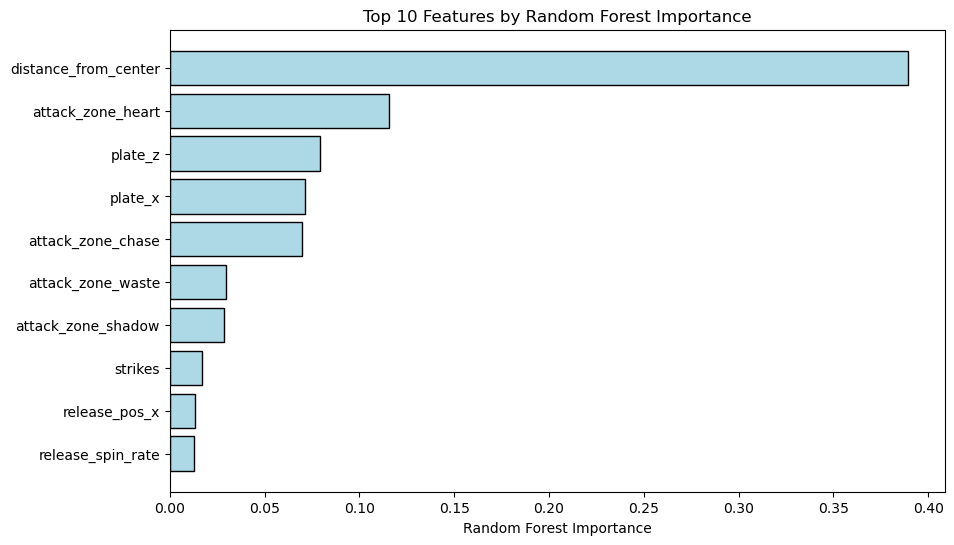

In [12]:
#Here we plot the top 10 features from highest to lowest importance horizontally
plt.figure(figsize=(10, 6))
#Here we plot with the coolwarm palette
plt.barh(range(10,0,-1), top_10_scores, color='lightblue', edgecolor='black')
plt.yticks(range(10,0,-1), X_train.columns[top_10_indices])
plt.title('Top 10 Features by Random Forest Importance')
plt.xlabel('Random Forest Importance')
#plt.savefig('images/feature_selection.png', dpi=300, bbox_inches='tight')
plt.show()

As we can see, by means of the Random Forest Classifier we can select **10 features** out of **54** we have according to their importance in the decision-making process. However, it is important to note two limitations of this approach:

* Correlated features in our dataset will be given equal or similar importance since they contribute collectively to the model's predictive performance.

* Random Forests and Decision Trees, in general, give preference to features with high cardinality since, when a Decision Tree or a Random Forest is constructing its nodes, it selects features to split the data based on the criterion that minimizes impurity. Features with high cardinality, i.e., a large number of unique values, provide more opportunities for the algorithm to create meaningful splits and partitions within the data.

By taking into account the limitations for this approach, we decided to select the Top-10 most important features in order to train our classification models. These features are:

1. **Distance from Center:** The Euclidean distance between the center of the Strike-Zone $(0,2.5)$ (see the plot for the Pitch Distribution) and the coordinates for each pitch.

2. **Heart Attack Zone:** This feature is the One-Hot Encoded representation of the question: "The pitch belongs to the Heart Attack Zone?". The Heart Zone is the area where all pitches should be called strikes.

3. **plate_z:** Vertical position of the ball when it crosses home plate from the catcher's perspective.

4. **Chase Attack Zone:** This feature is the One-Hot Encoded representation of the question: "The pitch belongs to the Chase Attack Zone?". The Chase Zone covers the area that is definitively outside of the **true** Strike-Zone and the Shadow Zone.

5.  **plate_x:** Horizontal position of the ball when it crosses home plate from the catcher's perspective.

6. **Waste Attack Zone:** This feature is the One-Hot Encoded representation of the question: "The pitch belongs to the Waste Attack Zone?". The Waste Zone covers the area where pitches should never be called strikes.

7. **Shadow Attack Zone:** This feature is the One-Hot Encoded representation of the question: "The pitch belongs to the Shadow Attack Zone?". The Shadow Zone is the area where pitches are called strikes $50\%$ of the time.

8. **strikes:** Pre-pitch number of strikes in count.

9. **release_pos_x:** Horizontal Release Position of the ball measured in feet from the catcher's perspective.

10. **release_spin_rate:** Spin rate of the pitch.

As we can see, our Feature Engineering process successfully captured information relevant to the Decision Process an umpire carries on when deciding if a pitch is a strike or not since our newly-defined Attack Zones along with the Distance of a Pitch from the center are within the most important features according to the Random Forest model. Elaborating on this we can observe the following things:

* Intuitively we knew that the position at which the ball crosses the plate after a pitch is relevant in order to classify a pitch into strike, since it always has to cross at the Strike-Zone. This is reflected in the **distance_from_center**, **plate_z** and **plate_x** features since they are within the top-10 most relevant features according to the Random Forest model. This makes us conclude that geographical features are the most important features in the decision making process of an umpire since its main goal during the game is assessing that a ball effectively crosses the Strike-Zone.

* We can see that the **Attack Zones** are also important features in the umpire's decision process. This expected since these categories also have an inherent geographical component to them. This is since a pitch that falls within the **Heart** Attack Zone has a very high probability of being called a strike, whereas a pitch that falls within the **Chase** zone has a very high probability of not being called a strike.

* Finally, we can get another interesting insight: the previous number of strikes in the count of a batter **is** influential on the decision-making process of an umpire, which suggests that an umpire can be biased depending on how high are the stakes on a given pitch. This can be thought in an equivalent to football as referees that are more likely to give a penalty in the last minutes of a very tense game.

Now that we've selected the features we will use to train our classification models, we can filter our data:

In [13]:
#Here we take the top 10 features from the training, validation and test sets
X_train_top_10 = X_train[X_train.columns[top_10_indices]]
X_val_top_10 = X_val[X_val.columns[top_10_indices]]
X_test_top_10 = X_test[X_test.columns[top_10_indices]]
print(f"The shapes of the training, validation and test sets with the top 10 features are {X_train_top_10.shape}, {X_val_top_10.shape} and {X_test_top_10.shape}, respectively.")

The shapes of the training, validation and test sets with the top 10 features are (186412, 10), (46604, 10) and (58255, 10), respectively.


-------------------------------------

### **3. Classification Models: Dummy Classifier**

Before trying to evaluate the performance of a Classification Model it is important to first build a **Baseline** model in order to be able to make more significative comparisons. In this case, we chose to build a **Dummy Classifier**. A Dummy Classifier (also known as a *null* model) is a simple Machine Learning model that provides basic predictions based on the class distributions or simple rules in our dataset. Dummy classifiers are useful in establishing a baseline for performance of a model. If a more advanced model does not perform significantly better than a dummy classifier, it might indicate that the model is not learning the underlying patterns in the data effectively.

Given that our dataset is **imbalanced** we chose to build a **Most Frequent** Dummy Classifier. This type of classifier always predicts the most frequent class in the training data. Since our dataset is imbalanced, the precision of this classifier will be equivalent to the proportion of the most represented class in our dataset, and if more complex classification models don't perform better than this baseline model, this could mean that the classifier might be learning to predict the majority class most of the time, achieving high accuracy but failing to capture the minority class.

Building our Dummy Classifier:

In [14]:
#Here we build a dummy classifier that always predicts the most frequent class in the training set and fit it to the training set
dummy_classifier = DummyClassifier(strategy='most_frequent').fit(X_train_top_10, y_train)
#Here we predict the labels of the test set
y_pred_dummy = dummy_classifier.predict(X_test_top_10)

#Here we print performance metrics for the dummy classifier
print('Accuracy Score: ' + str(accuracy_score(y_test,y_pred_dummy)))
print('Precision Score: ' + str(precision_score(y_test,y_pred_dummy)))
print('Recall Score: ' + str(recall_score(y_test,y_pred_dummy)))
print('F1 Score: ' + str(f1_score(y_test,y_pred_dummy)))

Accuracy Score: 0.6677538408720282
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


As we anticipated, the accuracy score for our Dummy Classifier is equivalent to the proportion of the most common label (in this case near $66\%$), therefore we can conclude a-priori that accuracy will **not** be a good metric to evaluate our Classification Models going on. Also, as expected, we have that Precision, Recall and F1 Score are all zero since the number of True Positives was zero. We can visualize this via the Confusion Matrix:

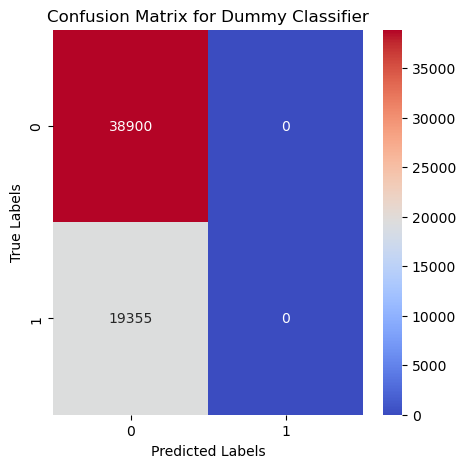

In [15]:
#Here we plot the confusion matrix of the dummy classifier
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dummy), annot=True, cmap='coolwarm', fmt='g')
plt.title('Confusion Matrix for Dummy Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.savefig('images/dummy_classifier.png', dpi=300, bbox_inches='tight')
plt.show()

As we can observe, the Dummy Classifier had a **high** number of True/False Negatives since we have more representation of the negative label 0 (not a strike) and this model always predicts the most frequent class. On the other side, as it never predicts the label 1, the number of True/False Positives was always zero. 

Now that we have the baseline accuracy that we need to optimize, we can finally build a more complex classification model. Specifically, a **Logistic Regression** model.

-------------------------------------

### **4. Classification Models: Logistic Regression**

**Logistic regression** is a statistical method for predicting binary classes. The logistic regression model applies the **sigmoid function** $h(x)$ to transform a linear combination of input features into a value between 0 and 1. The sigmoid function ensures that the output is confined within this range, making the output represent a probability. The model's parameters $\theta$, are iteratively adjusted during training to minimize the difference between predicted probabilities and actual class labels in the training data through a process known as maximum likelihood estimation. The objective is to find the optimal values for the model parameters $\theta$ that maximize the likelihood of observing the given set of outcomes in the training data.

In mathematical terms, the optimization problem for logistic regression can be framed as the minimization of the log-likelihood function:

\begin{equation*}
l(\theta) = -\frac{1}{m}\sum_{i = 1}^m y^{(i)}\log \left(h_{\theta} (x^{(i)})\right) + (1-y^{(i)}) \log \left(1-h_{\theta} (x^{(i)})\right),
\end{equation*}

where $m$ is the number of training points, $y^{(i)}$ is the actual class label of the $i$-th instance and $h_{\theta} (x^{(i)})$ is the predicted probability of the $i$-th instance belonging to the positive class.

We can build a standard (with default parameters) Logistic Regression model with `sklearn` as:

In [16]:
#Here we build a Logistic Regression classifier and fit it to the training set
logistic_classifier = LogisticRegression().fit(X_train_top_10,y_train)
#Here we predict the labels of the validation set since we want to tune the hyperparameters of the model
y_pred_logistic = logistic_classifier.predict(X_val_top_10)

#Here we print performance metrics for the logistic regression classifier
print('Accuracy Score: ' + str(accuracy_score(y_val,y_pred_logistic)))
print('Precision Score: ' + str(precision_score(y_val,y_pred_logistic)))
print('Recall Score: ' + str(recall_score(y_val,y_pred_logistic)))
print('F1 Score: ' + str(f1_score(y_val,y_pred_logistic)))

Accuracy Score: 0.9211011930306412
Precision Score: 0.8808955416478482
Recall Score: 0.8817489020924826
F1 Score: 0.8813220152987122


By fitting the default **Logistic Regression** model to our training data we can see that we obtain a much robust model. While the overall accuracy of our model in the validation set is approximately $0.92$, as we've seen before, accuracy alone may not be the most reliable metric since we are working on an imbalanced dataset (let's remember that a Dummy Classifier achieved an accuracy of $\approx 0.66$). Therefore we can focus more on metrics like Precision, Recall or the F1 Score:

> Our Logistic Regression model obtained a precision and recall value of approximately $0.88$, which indicates that when the model predicts the positive class, it is correct about 88% of the time. This is not bad considering that the positive class is underrepresented in our dataset. This indicates that the Logistic Regression model is is effective in identifying a substantial proportion of the actual positive classes in our dataset.

We can plot its confusion matrix:



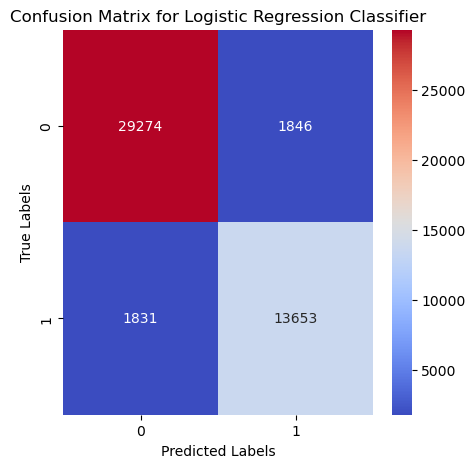

In [17]:
#Here we plot the confusion matrix of the dummy classifier
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_val, y_pred_logistic), annot=True, cmap='coolwarm', fmt='g')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.savefig('images/logistic_conf.png', dpi=300, bbox_inches='tight')
plt.show()

Observing at out misclassified instances, we can observe that we have more or less the same number of False Negatives/Positives. In our case, since we are trying to predict baseball pitches as **strike** or **not strike**, a False Negative means that we are giving as **not strike** a ball that was effectively a strike and a False Positive means that we are giving as **strike** a ball that wasn't. In the context of the game there is really not a "better" option between both of this options since both can cause serious problems and can determine the result of a game.

Ideally, we would want both: a model that minimizes both False Negatives and False Positives. Since this is in practice not possible, we can better try to make a **trade-off** between both of them. We can consider to maximize the F1 Score (the harmonic mean between precision and recall):

\begin{equation*}
\text{F1} = 2\cdot\frac{\text{Precision}\times \text{Recall}}{\text{Precision}+ \text{Recall}}
\end{equation*}

Since the F1 Score reflects a **trade-off** between precision and recall. It is higher when both precision and recall are high and balanced. If one of them is high while the other is low, the F1 Score will be lower. This, at the same time encourages a balance between False Positives and False Negatives.

Therefore we chose to perform **Hyperparamter Tuning** via a **Grid Search** for our Logistic Regression model by taking into account that we want to maximize the F1 Score, in order to achieve a balance between False Positives and False Negatives.

#### **4.1. Hyperparameter Tuning via Grid Search**

Grid search is a hyperparameter tuning technique used in Machine Learning to find the optimal combination of hyperparameter values for a given model. In a grid search, we define a grid of hyperparameter values that we want to explore. The grid represents all possible combinations of these values. The algorithm then trains and evaluates the model for each combination of hyperparameters. Grid search is an exhaustive approach, since it considers all possible combinations within our specified grid.

The main hyperparameters we can explore and tune in Logistic Regression for the `sklearn` [package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) are: `solver`, `penalty`, and `regularization_strength`. These hyperparameters have the following definitions:

* **solver:** Algorithm to use in the optimization problem. This are, the algorithms that minimize the log-likelihood function.

* **penalty:** Specifies the norm of the penalty. This parameter is used to control the regularization of the model. Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function. The purpose of regularization is to reduce the complexity of the model, which can lead to better generalization performance on unseen data. The most common types of regularization are L1 and L2. 

* **C (Inverse Regularization Strength):** This parameter must be a positive float. Since we're performing model regularization, the regularization term normallu penalizes large coefficients. Since the size of each coefficient in the loss function depends on the scale of its corresponding variable, scaling the data is required so that the regularization penalizes each variable equally. The regularization strength is determined by C and as C increases, the regularization term becomes smaller (and for extremely large C values, it's as if there is no regularization at all).

We can explore different values of these variables via Grid Search (maximizing the F1 Score) as follows:

In [18]:
#Here we build a Logistic Regression classifier
logistic_classifier = LogisticRegression()

#Here we define the grid of hyperparameters to search
grid_values = {'penalty': ['l1', 'l2'],'C':[0.0001,.001,0.01,.1,1,10,100,1000], 'solver':['liblinear', 'saga']}
#Here we define the grid search object with the logistic regression classifier, the grid of hyperparameters and the f1 score as the scoring metric since we want to maximize it
grid_searcher = GridSearchCV(logistic_classifier, param_grid = grid_values,scoring = 'f1').fit(X_train_top_10, y_train)

#Here we print the best hyperparameters
print('Best Parameters: ' + str(grid_searcher.best_params_))

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


Now we can finally make predictions for our test set with our optimized Logistic Regression model:

In [19]:
#Here we predict the labels of the test set for the best model
y_pred_logistic = grid_searcher.predict(X_test_top_10)

#Here we print performance metrics for the logistic regression classifier
print('Accuracy Score: ' + str(accuracy_score(y_test,y_pred_logistic)))
print('Precision Score: ' + str(precision_score(y_test,y_pred_logistic)))
print('Recall Score: ' + str(recall_score(y_test,y_pred_logistic)))
print('F1 Score: ' + str(f1_score(y_test,y_pred_logistic)))

Accuracy Score: 0.9221182731096044
Precision Score: 0.886166996768477
Recall Score: 0.8784293464221131
F1 Score: 0.8822812070262837


As we can see we didn't get better results even when performing a Grid Search between the main hyperparameters of the Logistic Regression model. Nevertheless, we still got a high **recall** and **precision** scores along with a **high** F1 Score meaning that our model is still effective in classifying the actual positive classes in our data.

#### **4.2. ROC Curve**

Finally, in order to conclude the analysis for our first Classification Model, we can plot its **ROC Curve** compared to the one by our Dummy Classifier. The **Receiver Operating Characteristic (ROC)** curve is a graphical representation that illustrates the performance of a binary classification model at various threshold settings. It displays the trade-off between the **true positive rate** (sensitivity or recall) and the **false positive rate** across different threshold values.

If we plot it:

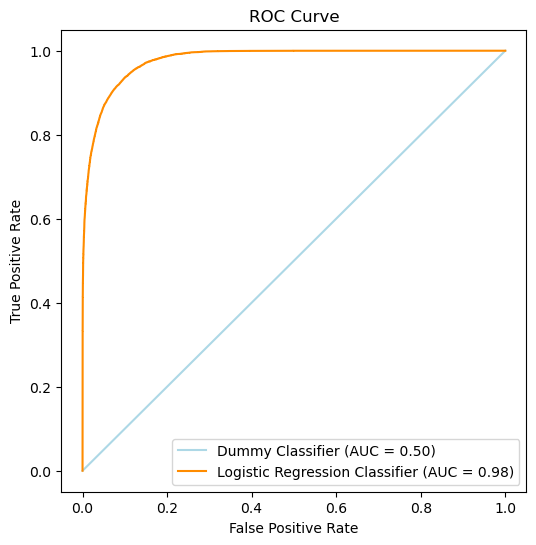

In [20]:
#Here we plot the ROC curve of the dummy classifier and the logistic regression classifier
plt.figure(figsize=(6, 6))
#Here we obtain the false positive rate and true positive rate of the dummy classifier
#We use the predict_proba method to obtain the probability of the positive class (the second column)
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_classifier.predict_proba(X_test_top_10)[:,1])
#We also obtain the AUC score of the dummy classifier
auc_dummy = roc_auc_score(y_test, dummy_classifier.predict_proba(X_test_top_10)[:,1])
#Here we plot the ROC curve of the dummy classifier
plt.plot(fpr_dummy, tpr_dummy, color='lightblue', label='Dummy Classifier (AUC = %0.2f)' % auc_dummy)

#Here we plot the ROC curve of the logistic regression classifier
#We obtain the false positive rate and true positive rate of the logistic regression classifier
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, grid_searcher.predict_proba(X_test_top_10)[:,1])
#We also obtain the AUC score of the logistic regression classifier
auc_logistic = roc_auc_score(y_test, grid_searcher.predict_proba(X_test_top_10)[:,1])
#Here we plot the ROC curve of the logistic regression classifier
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', label='Logistic Regression Classifier (AUC = %0.2f)' % auc_logistic)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC is a probability curve and the AUC (Area Under the Curve) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0 (not strikes) classes as 0 and 1 (strikes) classes as 1.

As we can see from our plot, our Logistic Regression model does an almost **perfect** job in distinguishing between classes since it has an AUC value near to the 1 which means it has a good measure of separability.  

-------------------------------------

### **5. Classification Models: Feed-Forward Neural Network**

As a last classification model, we built a **Feed-Forward Neural Network** Classifier. In general, Neural Networks can be thought of as functions that approximate the relation between given inputs and their output. Mostly with Supervised Learning, they'll try to learn the function that maps inputs with the output and later they use that function to predict the output on new inputs. A Feed-Forward Neural Network is a collection of layers of **sigmoid** neurons. According to the [Universal Approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem), if we connect multiple sigmoid neurons in an effective way, we can approximate the combination of neurons to any complex relationship between input and the output, required to deal with non-linear data.

A Feed-Forward Neural Network is composed of many sigmoid neurons. The layers present between the input and output layers are called **hidden layers**. The hidden layers are used to handle the complex non-linearly separable relations between input and the output. Each neuron in a hidden layer receives inputs from the previous layer, applies a weighted sum and an activation function (such as the sigmoid function), and then passes the result to the next layer. In general Neural Network adjust their weights through **backpropagation** and **gradient descent**, minimizing the difference between predicted and actual outputs. This iterative learning process enables the network to adapt to the underlying patterns in the data, making it capable of making accurate predictions on new, unseen inputs.

The general architecture of these type of Networks can be exemplified by the following diagram:



It has 3 layers,
with the following number of nodes per layer [10, 8, 2]


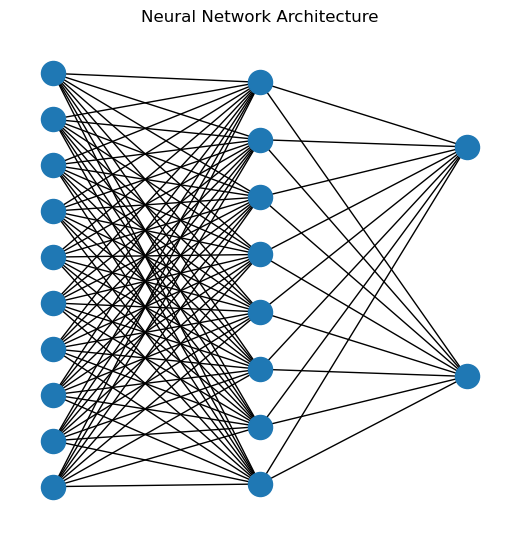

In [21]:
#Here we build a neural network diagram with a single hidden layer with 8 neurons and an output layer with 2 neurons
#Here we initialize the neural network
net = Network(sizes=[10, 8, 2])

#Here we plot the neural network architecture
plt.figure(figsize=(5, 5))
net.graph()
plt.title('Neural Network Architecture')
#plt.savefig('images/neural_network_architecture.png', dpi=300, bbox_inches='tight')
plt.show()

A **Neural Network Classifier** works by utilizing a network of interconnected neurons to process input data and produce output predictions. The process can be summarized in the following steps:

1. The Neural Network begins with an **input layer** that receives the raw featuresfrom the dataset. Each node in this layer represents a feature, and the values are the input data.

2. The input values are multiplied by **weights**, and the weighted sum is calculated for each neuron in the subsequent layer. This is followed by the application of an activation function, such as the Rectified Linear Unit (ReLU) function. The activation function introduces non-linearity to the model, enabling it to learn and represent complex relationships.

3. The weighted sums and activation functions are successively applied through one or more **hidden layers**. These layers allow the network to learn hierarchical features and abstract representations of the input data.

4. The final hidden layer's activations are used to make **predictions**. In a classification task, the output layer often consists of nodes corresponding to different classes. The activation values in the output layer are interpreted as probabilities or confidence scores for each class.

5. Finally, the predicted output is compared to the actual labels, and a **loss** is calculated. Common loss functions for classification tasks include the Cross-Entropy Loss.

Neural Networks adjust their weights to **minimize** the loss by using an optimization algorithm, typically Gradient Descent. This process involves backward propagation of the error through the network, updating weights to reduce the difference between predicted and actual outputs. Steps 2 to 5 are repeated iteratively over the training set to optimize the model's weights. Once trained, a Neural Network can be used to make predictions on new data by passing it through the trained network architecture. 

In order to build and train a Neural Network classifier we used the `PyTorch` Python package. As a first step, we converted our arrays to **PyTorch Tensors**:

In [22]:
#Here we convert the training, validation and test sets to tensors
train_x= torch.Tensor(np.array(X_train_top_10.values)).type(torch.FloatTensor)
train_y = torch.Tensor(np.squeeze(y_train.values)).type(torch.LongTensor)
val_x = torch.Tensor(np.array(X_val_top_10.values)).type(torch.FloatTensor)
val_y = torch.Tensor(np.squeeze(y_val.values)).type(torch.LongTensor)
test_x = torch.Tensor(np.array(X_test_top_10.values)).type(torch.FloatTensor)
test_y = torch.tensor(np.squeeze(y_test.values)).type(torch.LongTensor)

#Here we print the shapes of the tensors
print(f"The shape of the training input is: {train_x.shape}")
print(f"The shape of the training output is: {train_y.shape}")
print(f"The shape of the validation input is: {val_x.shape}")
print(f"The shape of the validation output is: {val_y.shape}")
print(f"The shape of the test input is: {test_x.shape}")
print(f"The shape of the test output is: {test_y.shape}")

The shape of the training input is: torch.Size([186412, 10])
The shape of the training output is: torch.Size([186412])
The shape of the validation input is: torch.Size([46604, 10])
The shape of the validation output is: torch.Size([46604])
The shape of the test input is: torch.Size([58255, 10])
The shape of the test output is: torch.Size([58255])


#### **5.1. Hyperparameter Tuning via Grid Search**

To build and train our model, we have to choose its architecture and its hyperparameters carefully to ensure optimal performance and generalization without having overfitting. Hyperparameters are external configurations that are not learned from the data during training. Hyperparameters we will use for our classifier are:

1. **Learning Rate**: The step size at which the model adapts during training. A higher learning rate may speed up convergence but risks overshooting the optimal solution, while a lower learning rate may converge more slowly but with more stability.


2. **Number of Hidden Neurons**: The size of the hidden layers in the neural network. This affects the capacity of the model to capture complex patterns. Too few neurons may result in underfitting, while too many may lead to overfitting.

3. **Epochs**: The number of times the entire training dataset is passed through the model during training. Too few epochs may result in underfitting, while too many may lead to overfitting.

3. **Regularization Technique (Dropout)**: The Dropout Technique is employed to prevent overfitting by adding penalties for overly complex models. Specifically, this technique involves randomly "dropping out" (i.e., setting to zero) a proportion of neurons in the hidden layers during each training iteration. In this case, the hyperparameter is the **probability** of dropping out neurons.

4. **Activation Function**: The choice of activation function (sigmoid, tanh, or ReLU) can impact the model's ability to capture non-linear relationships in the data.

5. **Loss Function**: The selection of an appropriate loss function depends on the nature of the task (e.g., classification or regression) and influences how the model adjusts its parameters during training.

6. **Optimizer**: The optimization algorithm, such as stochastic gradient descent (SGD) or ADAM, determines how the model's weights are updated based on the computed gradients during backpropagation.

In order to choose the **optimal** values for these hyperparameters we performed a **Grid Search** on our Neural Network Classifier using the `Ray` Python package. Since Grid Search is a very expensive task, we decided to pre-define some of these hyperparametes a-priori in order to reduce time complexity. Our pre-defined hyperparameters were:

- **Activation Function**: We decided to use the Rectified Linear Unit (ReLU) activation function since it is computationally efficient and it is a popular choice in various Neural Network architectures.

- **Loss Function**: We decided to use the Cross-Entropy Loss function since it is a common loss function for classification tasks. For example, Cross Entropy Loss is commonly used as the loss function in Logistic Regression models.

- **Optimizer**: We decided to use the ADAM (Adaptive Moment Estimation) optimizer since this algorithm is often preferred over simple gradient descent for training Deep Learning models due to its adaptability and fast convergence. ADAM optimizes the learning process by maintaining separate adaptive learning rates for each parameter.

Therefore, we performed GridSearch for the learning rate, number of hidden neurons, epochs and dropout probability hyperparameters. As a Neural Network architecture, we chose a simple Neural Network with **one** hidden layer (this is a relatively straightforward classification task) and an output layer with two neurons (probability of belonging to each class). The implementation of this architecture can be seen on the `BinaryClassifier` class of our `neural_net.py` module along with the `train_step` function that performs one training step for this network.

In order to perform Grid Search we first defined a function that trains our model given a dictionary of hyperparameters:


In [23]:
def train_model(config: dict, tuning: bool = True) -> Tuple[List[float], List[float]]:
    """
    Function that trains the model.

    Args:
        config (dict): Dictionary with the configuration of the model.
        y_test (Tensor): The test labels.
        tuning (bool, optional): Whether we are tuning the model or not. Defaults to True.
    """
    #If we are not tuning the model, we save the validation and training losses
    if tuning==False:
        #Here we initialize the lists of losses
        train_losses, val_losses = [], []

    #First we initialize the model
    model = BinaryClassifier(hidden_size= config['hidden_size'], dropout= config['dropout'])
    #Here we initialize the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])
    
    #Here we iterate over the number of epochs
    for _ in range(config['epochs']):
        #Here we perform a training step
        loss_train, loss_val = train_step(model, optimizer, train_x, train_y, val_x, val_y)
        #If we are not tuning the model, we save the validation and training losses
        if tuning==False:
            train_losses.append(loss_train)
            val_losses.append(loss_val)

    #If we are not tuning the model, we return the training and validation losses and the model
    if tuning==False:
        return train_losses, val_losses, model
    
    #If we are tuning the model, we obtain the F1 score of the model in our validation set to maximize it
    y_pred_val = model.predict(val_x)
    #Here we compute the F1 score
    f1 = f1_score(val_y, y_pred_val)
    #Here we report the F1 score to Ray Tune in order to tune the model
    train.report({'f1': f1})

For the same reason as in the Logistic Regression case, we chose to perform **Hyperparamter Tuning** via a **Grid Search** by taking into account that we want to maximize the F1 Score, in order to achieve a balance between False Positives and False Negatives. In the next chunk of code, we define our parameter grid and use the `Tuner` class of `ray.tune` to perform Hyperparameter Tuning:

In [ ]:
#Here we define the configuration space of the model in order to find the best hyperparameters
config = {
    "hidden_size": tune.grid_search([6, 8, 10]),
    "dropout": tune.grid_search([0.001, 0.01, 0.1]),
    "learning_rate": tune.grid_search([0.001, 0.01, 0.1]),
    "epochs": tune.grid_search([500, 1000])
}

#Here we initialize the tuner. This class is used to tune the hyperparameters of the model
tuner = tune.Tuner(
    train_model,
    param_space=config,
)

#Here we start the tuning process
results = tuner.fit()

Finally, we can obtain the best hyperparameters that maximize the **F1 Score**:

In [25]:
#Here we obtain the best configuration from the Tuner
best_config = tuner.get_results().get_best_result(metric='f1', mode='max')
#Here we print the best configuration
print(f"The best configuration is: {best_config.config}, with a F1 score of {round(best_config.metrics['f1'],2)}")

The best configuration is: {'hidden_size': 8, 'dropout': 0.01, 'learning_rate': 0.1, 'epochs': 1000}, with a F1 score of 0.89


#### **5.2. The Final Model**

Once we've obtained the best hyperparameters for our Neural Network Classifier we can finally train the model with these parameters and analyze the results. We can plot the loss curve as follows:

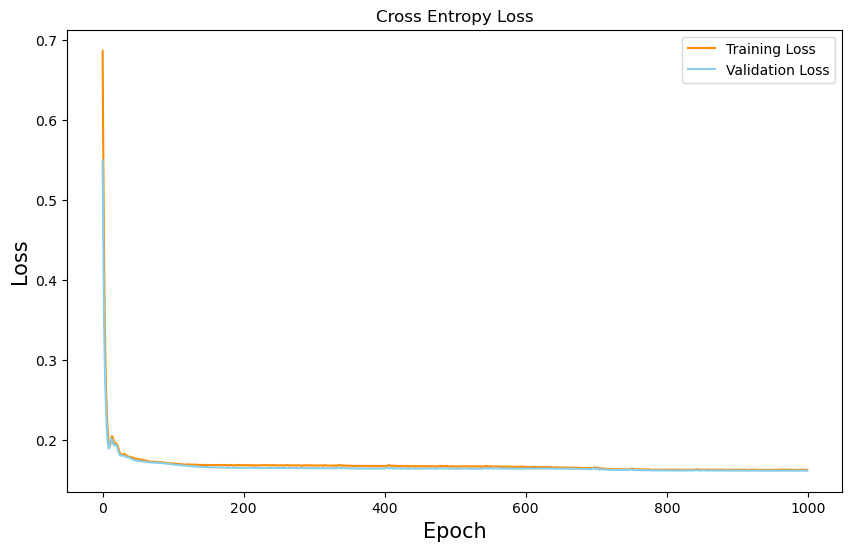

In [26]:
#Here we train the model with the best configuration
train_losses, val_losses, model = train_model(best_config.config, tuning=False)

#Here we plot the training and validation losses
fig= plt.figure(figsize=(10, 6))
plt.plot(range(best_config.config['epochs']), train_losses, color='darkorange')
plt.plot(range(best_config.config['epochs']), val_losses, color='skyblue')
plt.xlabel('Epoch', size=15)
plt.ylabel('Loss', size=15)
plt.title('Cross Entropy Loss')
plt.legend(['Training Loss', 'Validation Loss'])

plt.show()

As we can see, our training and validation losses are almost indistinguishable which means that we are neither underfitting or overfitting, instead we have a good fit. We can notice there are some fluctuations in the loss curve but they are minimal. We can also plot the confusion matrix along with some metrics for the **test set**:

Accuracy Score: 0.9294309501330358
Precision Score: 0.8987653029193261
Recall Score: 0.8875742702144149
F1 Score: 0.8931347318620187


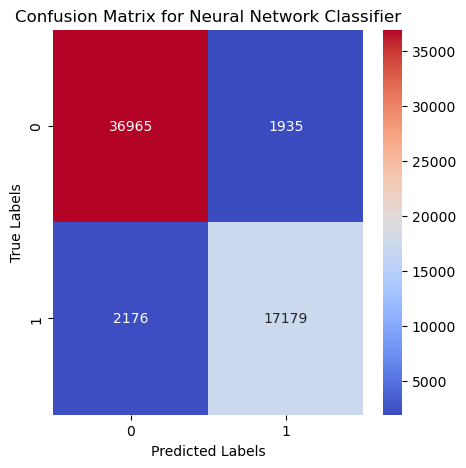

In [27]:
#Here we print performance metrics for the neural network classifier
print('Accuracy Score: ' + str(accuracy_score(y_test,model.predict(test_x))))
print('Precision Score: ' + str(precision_score(y_test,model.predict(test_x))))
print('Recall Score: ' + str(recall_score(y_test,model.predict(test_x))))
print('F1 Score: ' + str(f1_score(y_test,model.predict(test_x))))

#Here we make the confusion matrix for the neural network
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(test_y, model.predict(test_x)), annot=True, cmap='coolwarm', fmt='g')
plt.title('Confusion Matrix for Neural Network Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

We can see that we achieved similar results than for our Logistic Regression Classifier with a slight improvement on the F1 Score. Nevertheless we can say that both classifiers demonstrate comparable performance overall. This can make us conclude that while the Neural Network may offer a higher capacity for learning intricate relationships, the little improvement in F1 Score suggests that the additional complexity may not be justified for this particular problem.

We can elaborate on this by observing the ROC curve:

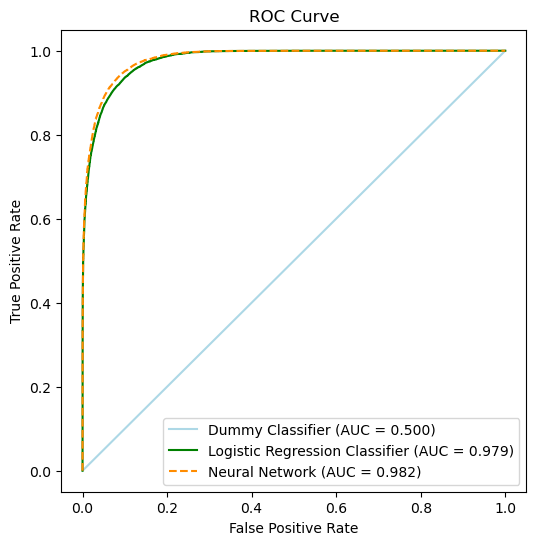

In [30]:
#Here we make the ROC curve for the neural network along with the dummy classifier and the logistic regression classifier
plt.figure(figsize=(6, 6))
#Here we obtain the false positive rate and true positive rate of the dummy classifier
#We use the predict_proba method to obtain the probability of the positive class (the second column)
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_classifier.predict_proba(X_test_top_10)[:,1])
#We also obtain the AUC score of the dummy classifier
auc_dummy = roc_auc_score(y_test, dummy_classifier.predict_proba(X_test_top_10)[:,1])
#Here we plot the ROC curve of the dummy classifier
plt.plot(fpr_dummy, tpr_dummy, color='lightblue', label='Dummy Classifier (AUC = %0.3f)' % auc_dummy)

#Here we plot the ROC curve of the logistic regression classifier
#We obtain the false positive rate and true positive rate of the logistic regression classifier
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, grid_searcher.predict_proba(X_test_top_10)[:,1])
#We also obtain the AUC score of the logistic regression classifier
auc_logistic = roc_auc_score(y_test, grid_searcher.predict_proba(X_test_top_10)[:,1])
#Here we plot the ROC curve of the logistic regression classifier
plt.plot(fpr_logistic, tpr_logistic, color='green', label='Logistic Regression Classifier (AUC = %0.3f)' % auc_logistic)

#Here we plot the ROC curve of the neural network
#We obtain the false positive rate and true positive rate of the neural network
fpr_nn, tpr_nn, _ = roc_curve(test_y, model.predict_proba(test_x)[:,1])
#We also obtain the AUC score of the neural network
auc_nn = roc_auc_score(test_y, model.predict_proba(test_x)[:,1])
#Here we plot the ROC curve of the neural network
plt.plot(fpr_nn, tpr_nn, color='darkorange', label='Neural Network (AUC = %0.3f)' % auc_nn, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
#plt.savefig('images/roc.png', dpi=300, bbox_inches='tight')
plt.show()

As we can see the AUC values for both our classifiers are a significant improvement from our previously defined Random Classifier. Nevertheless these values are very similar, diferring only by 0.003, meaning that the ability of both classifiers to discriminate between positive and negative instances is nearly identical. 

With AUC values near 0.98 we can say that our classifiers demonstrate a strong ability to distinguish between positive and negative instances in the dataset. This substantial performance improvement over the Random Classifier emphasizes the value of our feature selection and model training processes in creating models that can effectively differentiate between positive and negative instances.

#### **5.3. Predicting the Attack Zones**

Once we've built our final models it is interesting to notice that we can **recreate** our previously-defined Attack Zones by obtaining the **strike probabilities** given by each of our Classification models. Since by definition each one of these zones marks a different probability of a pitch to be called a strike, we would expect that our classifiers classifies pitches in each zone accordingly.

For our Neural Network classifier:

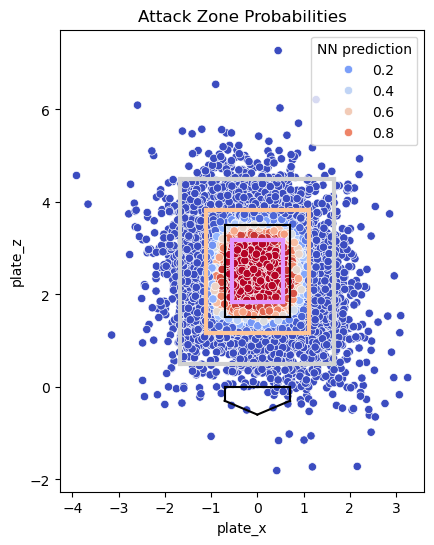

In [31]:
#Here we obtain the original dataset with the uid of only the test data and the top 10 features
test_dataset = raw_dataset.loc[X_test_top_10.index]

#Here we add the predictions of the neural network to the test dataset
test_dataset['NN prediction'] = model.predict_proba(test_x)[:,1]

#Here we plot the distribution of attack zones
plt.figure(figsize=(6,6))
fig = sns.scatterplot(data=test_dataset.sample(5000, random_state=42), x='plate_x', y='plate_z', palette='coolwarm', hue='NN prediction')
fig.set_aspect('equal')
aux.draw_home_plate()
aux.draw_sz()
aux.draw_attack_zones()
plt.title('Attack Zone Probabilities')
#plt.savefig('images/az_pred.png', dpi=300, bbox_inches='tight')
plt.show()

We can observe that effectively our classifier associates a higher probability to pitches within the **Heart** zone whereas the probability for each one of the other zones decays from 0.6 to 0.2 depending on the geographic area. Moreover, these probabilities are similar to the ones defined by the [Statcast](https://baseballsavant.mlb.com/visuals/swing-take?playerId=545361) MLB tool:

- **Heart Zone**: Area over the plate where the probability of a pitch resulting in strike is roughly 0.73.

- **Heart Zone**: Area over the plate where the probability of a pitch resulting in strike is roughly 0.53. In our case it decays from 0.6 to 0.4 as pitches are close to the border.

- **Chase and Waste Zone**: Area over the plate where the probability of a pitch resulting in strike is roughly 0.23 and 0.06 respectively. In our case it is near 0.2 for both zones.